In [64]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [158]:
tr_history = pd.read_csv('hist_trx.csv')
tr = pd.read_csv('hits0712.csv')
mcc = pd.read_excel('Типы_MCC.XLSX')

In [14]:
mcc_distr = tr_history.groupby(['user_id', 'mcc_group']).agg(['mean', 'count']).amount

In [36]:
mcc_distr

mean  count
user_id    mcc_group                     
100006366  R            830.000000      1
           Z            500.500000      2
100013051  C            433.166667      6
           R            196.403750      8
           U            593.333333      6
...                            ...    ...
VSP9911909 R            157.362667     15
           U            875.000000      4
VSP9912220 C           1150.000000      2
           R            993.816000      5
VSP9915153 Z          10000.000000      1

[59526 rows x 2 columns]

In [31]:
mcc_distr.index[0]

('100006366', 'R')

In [37]:
mcc_distr.loc[('100006366', 'R')]

mean     830.0
count      1.0
Name: (100006366, R), dtype: float64

In [43]:
tr_history.atm_mcc.nunique()

282

In [107]:
mcc['Категория'].unique()

array(['Контрактные услуги', 'Оптовые поставщики и производители',
       'Авиалинии, авиакомпании', 'Аренда автомобилей', 'Отели и мотели',
       'Транспорт', 'Коммунальные и кабельные услуги', 'Поставщик услуг',
       'Розничные магазины', 'Автомобили и транспортные средства',
       'Магазины одежды', 'Различные магазины',
       'Продажи по почте/телефону', 'Личные услуги', 'Бизнес услуги',
       'Ремонтные услуги', 'Развлечения', 'Профессиональные услуги',
       'Членские организации', 'Государственные услуги', nan],
      dtype=object)

In [48]:
tr_history.mcc_group.nunique()

12

In [49]:
tr_history

,Unnamed: 0,event_id,date_time,user_id,sub_channel,event_type,sub_type,atm_mcc,mcc_group,atm_merchant_name,amount
0,0,22c9f1ac686a43e18cdb798489193238,2018-12-06 09:33:21,102050167,ISSUER_ACQUIRER,PAYMENT,POS_PURCHASE,5921.0,R,YUG 426,280.00
1,1,62dac13fac68416d9bc340c51ddcb977,2018-12-06 09:36:08,102050167,ISSUER_ACQUIRER,PAYMENT,POS_PURCHASE,5331.0,R,MAGAZIN RODINA,376.90
2,2,9b666b8c9d4d4faea78e2b28a5468794,2018-12-06 12:21:02,102050167,ISSUER_ACQUIRER,PAYMENT,POS_PURCHASE,5921.0,R,YUG 426,143.00
3,3,d4d805fc3d5f4c91aa9b0389333b780c,2018-12-06 07:46:58,102050167,ISSUER_ACQUIRER,PAYMENT,POS_PURCHASE,5331.0,R,MAGAZIN RODINA,162.00
4,4,1d162351117a4418949dcf94111b9964,2018-12-06 12:21:27,102050167,ISSUER_ACQUIRER,PAYMENT,POS_PURCHASE,5331.0,R,MAGAZIN RODINA,56.00
...,...,...,...,...,...,...,...,...,...,...,...
562485,53558,cdab8f7285a146a0959a079fe0628d75,2018-11-27 18:14:11,VSP14440557,ISSUER_ACQUIRER,PAYMENT,POS_PURCHASE,5411.0,R,PYATEROCHKA 9500,273.57
562486,53559,20be17c6aaf2443dacb8e23cc0ba1652,2018-11-27 19:18:13,VSP14440557,ISSUER_ACQUIRER,PAYMENT,ATM_P2P_DEBIT,4829.0,U,SBOL,7500.00
562487,53560,d99981bfd29c42b39209775d04564f4f,2018-11-27 19:17:27,VSP14440557,ISSUER_ACQUIRER,PAYMENT,ATM_P2P_DEBIT,4829.0,U,SBOL,2000.00
562488,53561,304543b0e67d4251b2811e10890ef60c,2018-11-27 07:20:05,VSP14440557,ISSUER_ACQUIRER,PAYMENT,POS_PURCHASE,5999.0,R,KREPOST,110.00


In [97]:
tr_history['mcc_cat'] = tr_history.atm_mcc.apply(lambda x: mcc.loc[int(x)]['Категория'] if int(x) in mcc.index else np.nan)

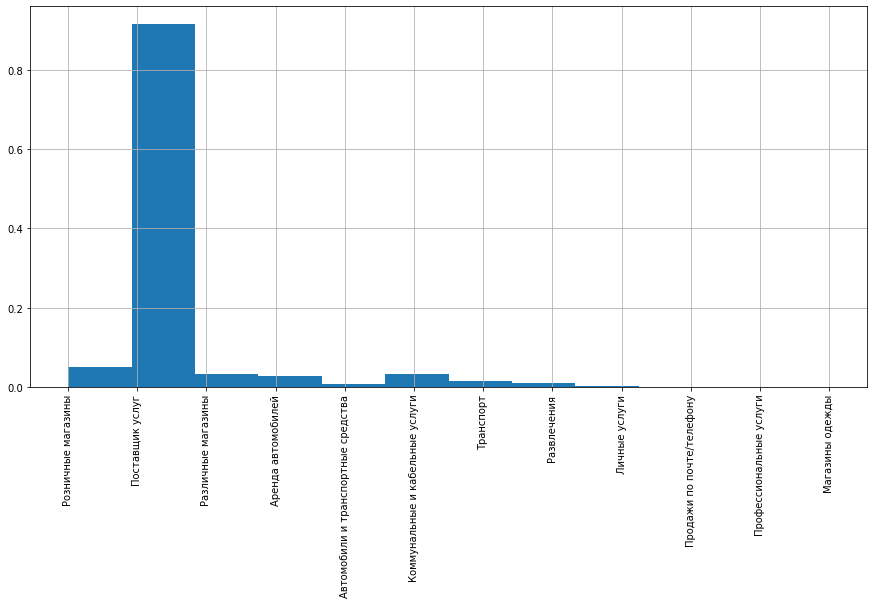

In [104]:
tr_history[tr_history.user_id.isin(tr.rec_user_id[tr.resolution != 'G'])].mcc_cat.hist(figsize =(15,7), xrot=90, density = True, 
                                                                                      bins = 12)

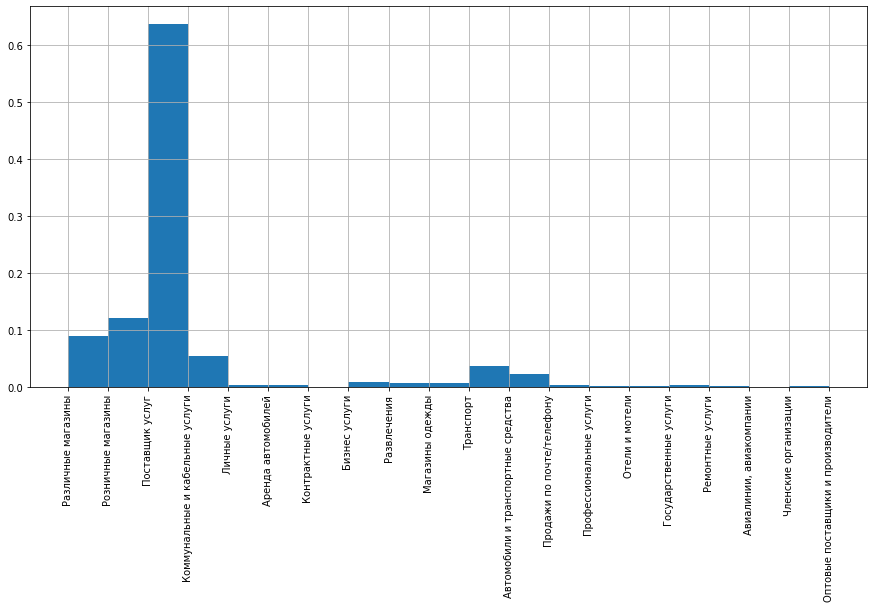

In [106]:
tr_history[tr_history.user_id.isin(tr.rec_user_id[tr.resolution == 'G'])|tr_history.user_id.isin(tr.user_id[tr.resolution == 'G'])].mcc_cat.hist(figsize =(15,7),
                                                                                       xrot=90, density = True, bins = 19)

In [159]:
mcc_encoded = OneHotEncoder(sparse =False).fit_transform(tr_history.mcc_group.fillna('N').values.reshape(-1,1))

In [169]:
oh_en = pd.DataFrame(np.hstack((tr_history[['user_id', 'amount']].values.reshape(-1,2), mcc_encoded)))
col = tr_history.mcc_group.unique()
col[5] = 'NA'
oh_en.columns = np.hstack((['user_id','amount'], col))

In [177]:
oh_en.groupby(by='user_id').mean().

,amount,R,U,Z,C,F,NA,A,T,X,H,J,O,Q
user_id,,,,,,,,,,,,,,
100006366,610.333333,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.666667
100013051,631.589722,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.222222,0.0,0.166667,0.000000,0.444444
100017681,43234.632911,0.0,0.063291,0.0,0.0,0.0,0.101266,0.0,0.0,0.177215,0.0,0.113924,0.012658,0.531646
100023450,1927.546667,0.0,0.306667,0.0,0.0,0.0,0.000000,0.0,0.0,0.413333,0.0,0.253333,0.000000,0.026667
100031471,60.000000,0.0,0.142857,0.0,0.0,0.0,0.000000,0.0,0.0,0.857143,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VSP847400,18904.500000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.500000,0.0,0.500000,0.000000,0.000000
VSP88139,18714.950476,0.0,0.142857,0.0,0.0,0.0,0.000000,0.0,0.0,0.095238,0.0,0.047619,0.238095,0.476190
VSP9911909,318.022000,0.0,0.050000,0.0,0.0,0.0,0.000000,0.0,0.0,0.750000,0.0,0.200000,0.000000,0.000000


In [178]:
oh_en.

,user_id,amount,R,U,Z,C,F,NA,A,T,X,H,J,O,Q
0,102050167,280.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,102050167,376.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,102050167,143.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,102050167,162.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,102050167,56.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562485,VSP14440557,273.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
562486,VSP14440557,7500.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
562487,VSP14440557,2000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
562488,VSP14440557,110.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
